In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [5]:
pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 111)

Getting the dataset and determining the target column

In [6]:
dataset = pd.read_excel("../dataset.xlsx")
target = dataset["SARS-Cov-2 exam result"]
dataset = dataset.drop("SARS-Cov-2 exam result", axis=1)

Feature types

In [7]:
dataset.dtypes.value_counts()

float64    70
object     36
int64       4
dtype: int64

Missing values

Patient ID                                               0.000000
Patient age quantile                                     0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydophila pneumoniae                                 0.760454
Parainflue

<AxesSubplot:>

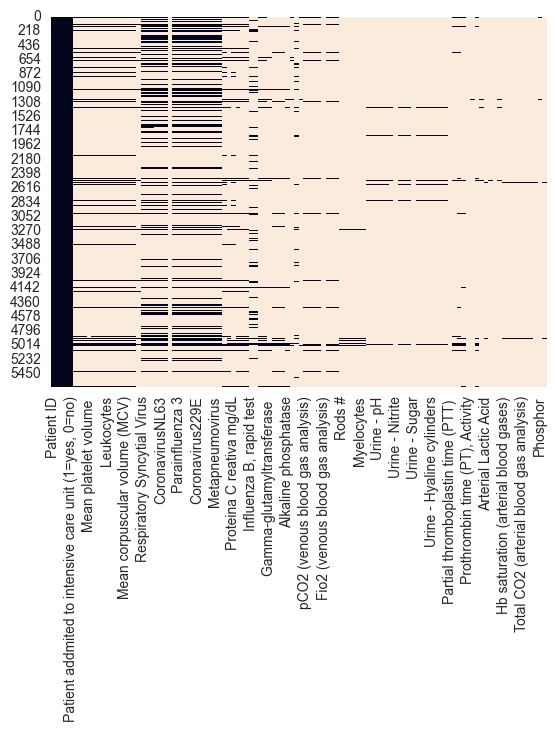

In [8]:
feature_presence = (dataset.isna().sum() / dataset.shape[0]).sort_values()
print(feature_presence)
sns.heatmap(dataset.isna(), cbar=False)

Target Visualization

<AxesSubplot:ylabel='SARS-Cov-2 exam result'>

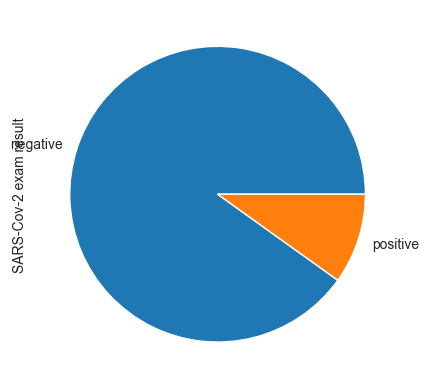

In [9]:
target.value_counts().plot.pie()

Removing unimportant features

In [10]:
delete_feature = [x for x in feature_presence.index if feature_presence[x] > 0.9]
delete_feature.append('Patient ID')
dataset = dataset.drop(delete_feature, axis=1)

Visualisation des variables continues

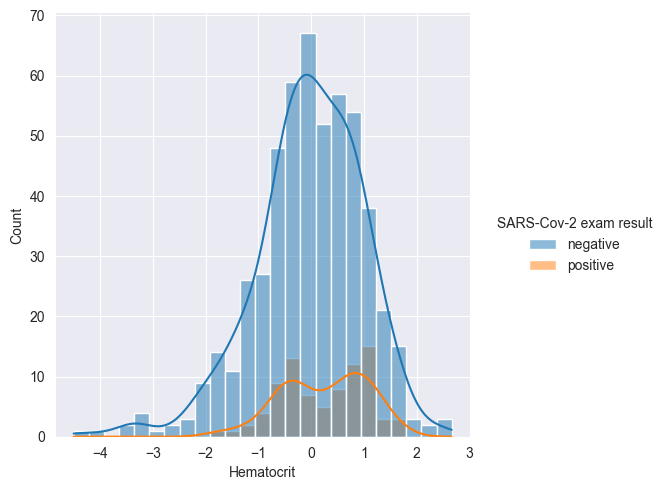

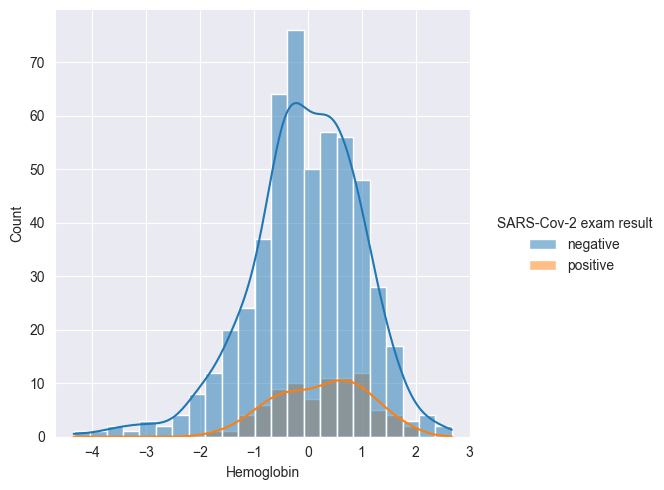

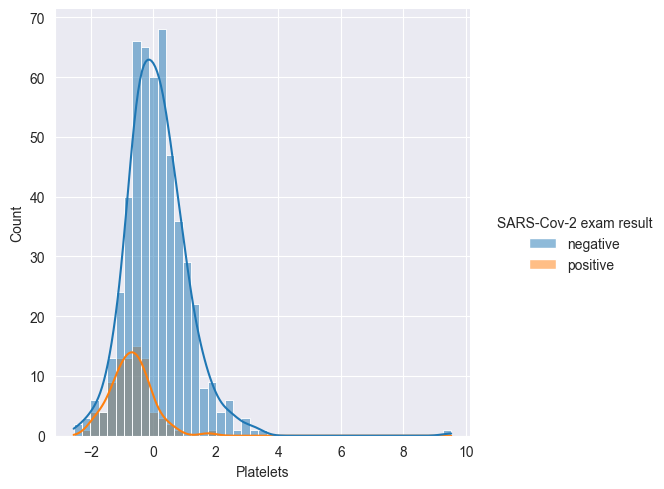

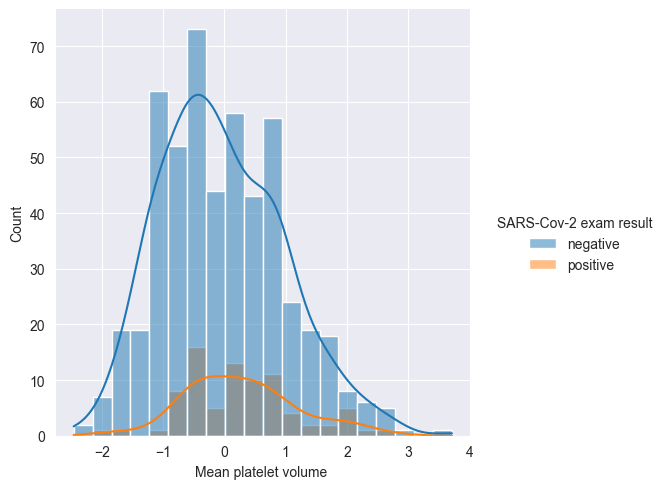

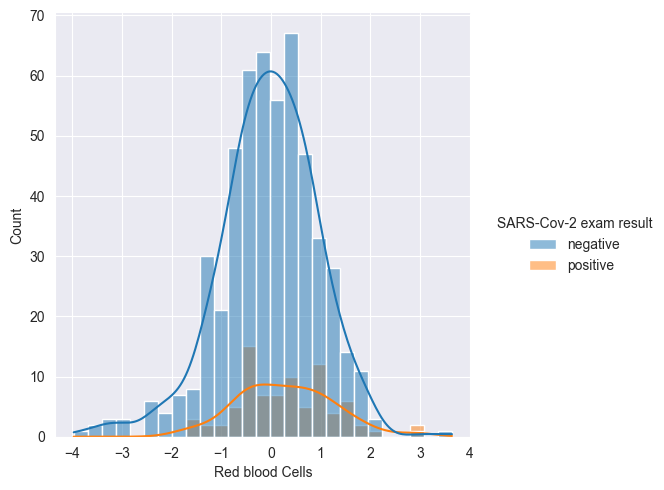

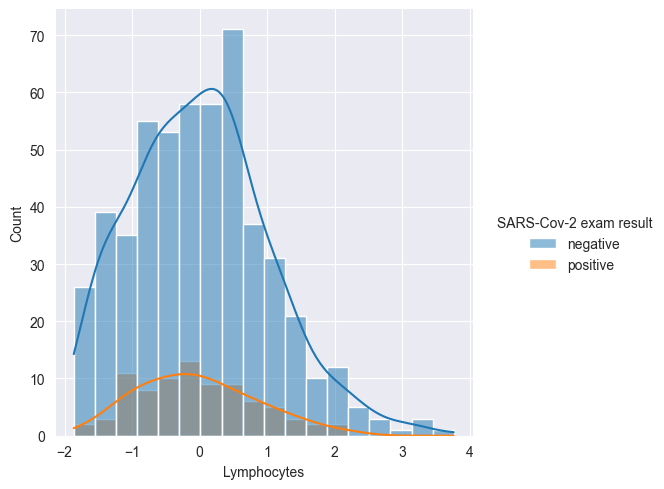

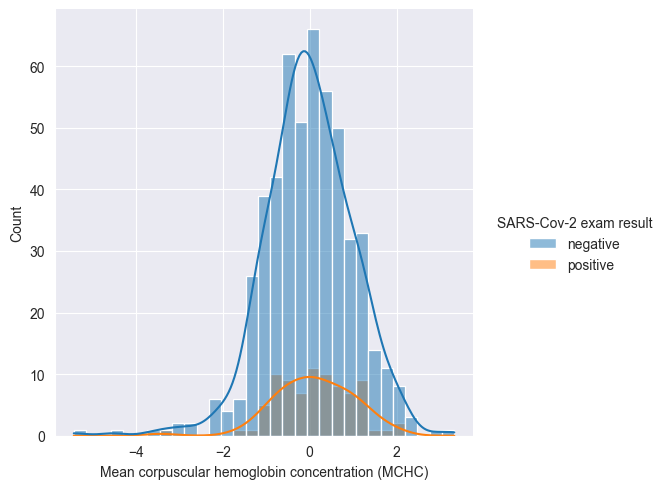

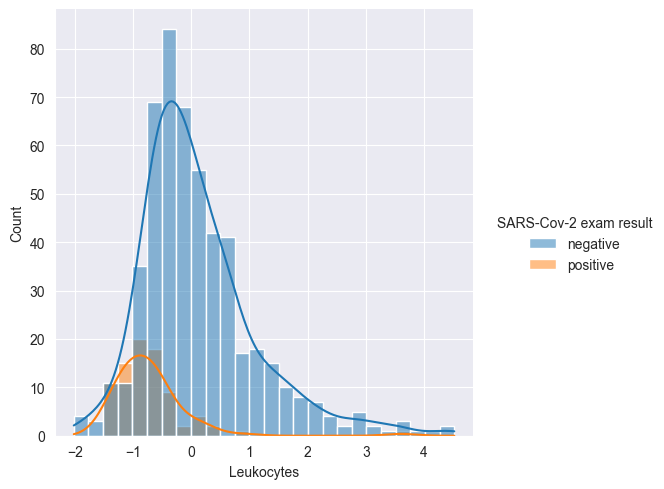

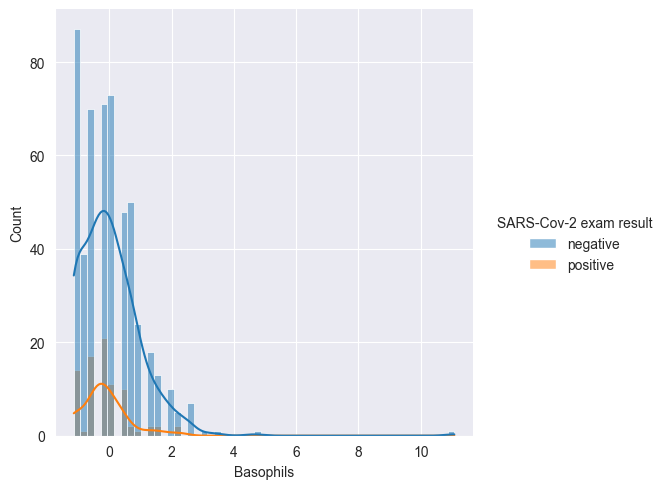

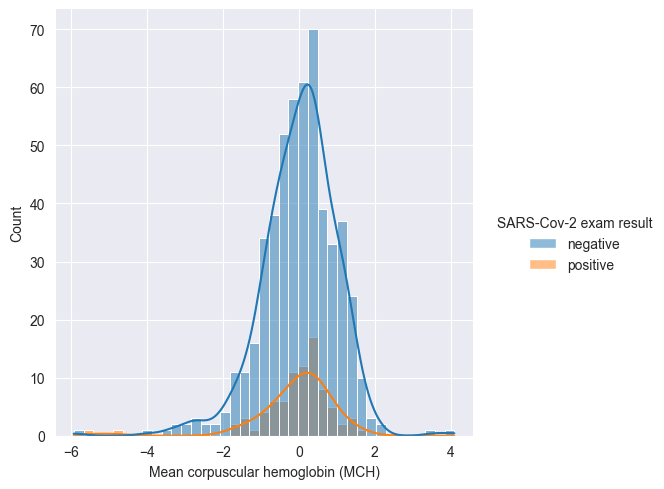

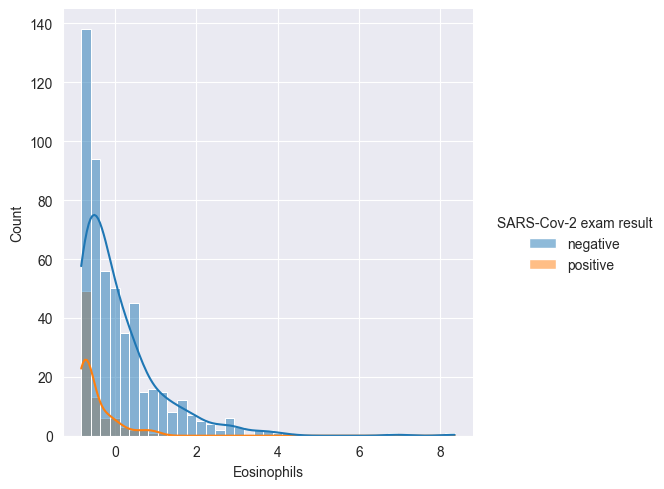

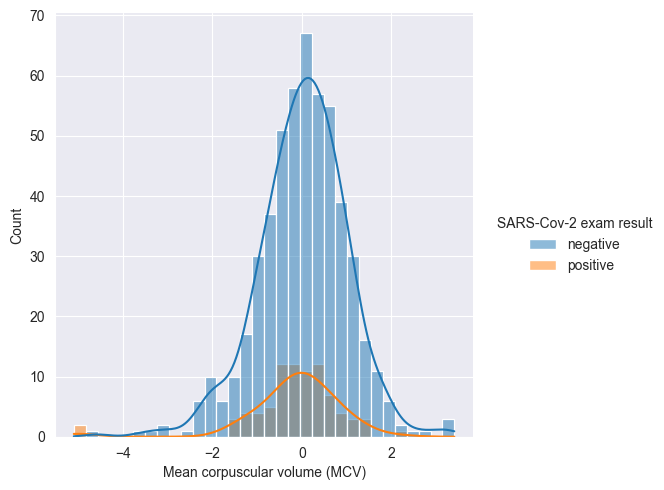

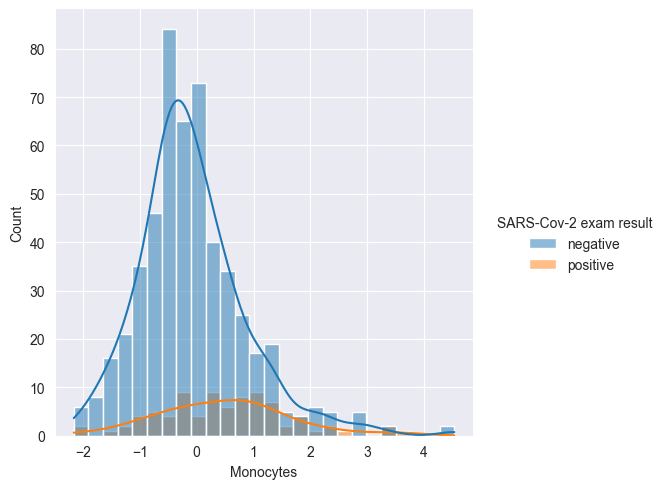

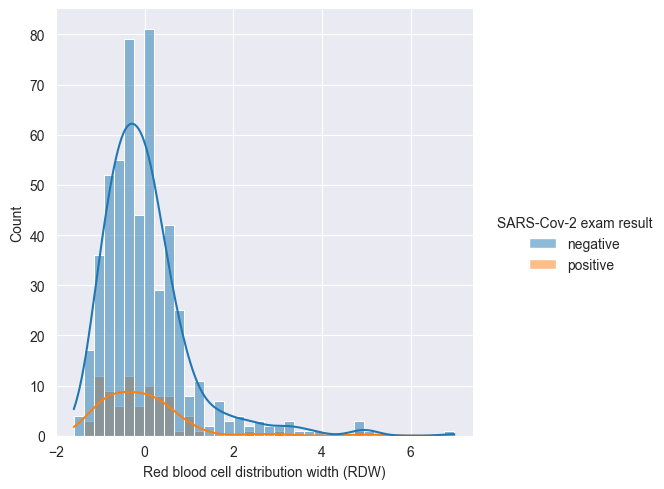

In [11]:
float_features = [col for col in dataset.columns if dataset[col].dtype == 'float']
for feature in float_features:
    sns.displot(x=feature, data=dataset, hue=target, kde=True)

Visualisation des variables categorielles

Respiratory Syncytial Virus------------- [nan 'not_detected' 'detected']
Influenza A----------------------------- [nan 'not_detected' 'detected']
Influenza B----------------------------- [nan 'not_detected' 'detected']
Parainfluenza 1------------------------- [nan 'not_detected' 'detected']
CoronavirusNL63------------------------- [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus------------------ [nan 'detected' 'not_detected']
Coronavirus HKU1------------------------ [nan 'not_detected' 'detected']
Parainfluenza 3------------------------- [nan 'not_detected' 'detected']
Chlamydophila pneumoniae---------------- [nan 'not_detected' 'detected']
Adenovirus------------------------------ [nan 'not_detected' 'detected']
Parainfluenza 4------------------------- [nan 'not_detected' 'detected']
Coronavirus229E------------------------- [nan 'not_detected' 'detected']
CoronavirusOC43------------------------- [nan 'not_detected' 'detected']
Inf A H1N1 2009------------------------- [nan 'not_

C:\Users\Lenovo\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\Lenovo\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


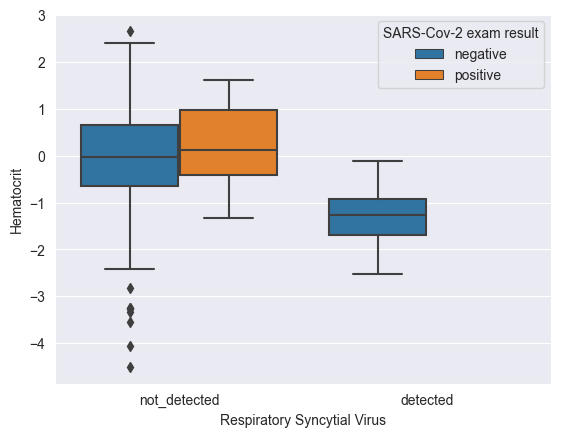

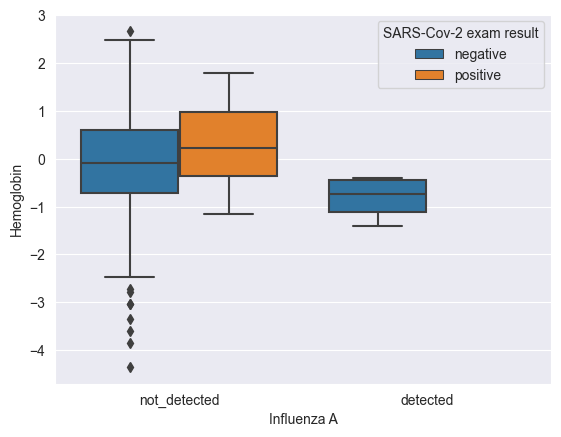

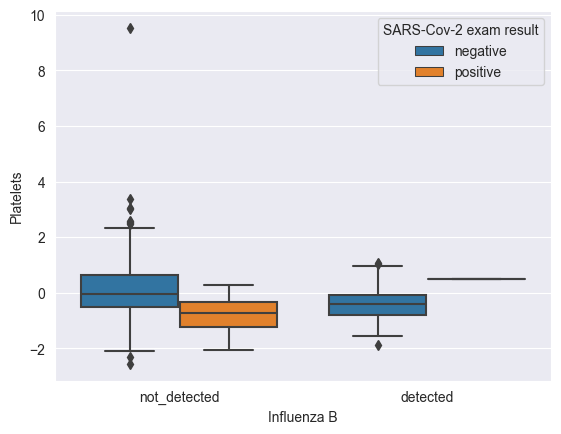

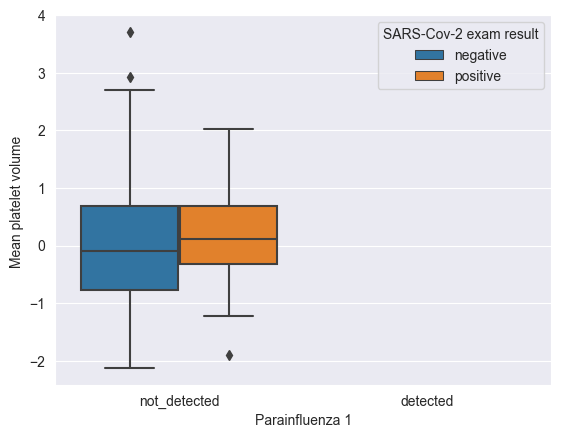

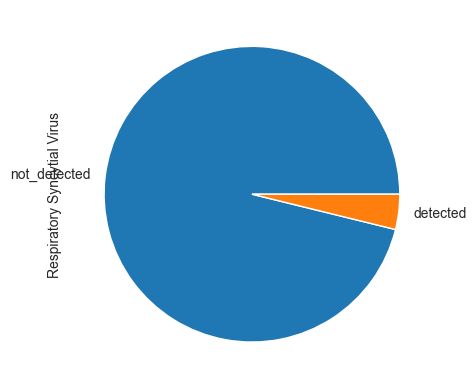

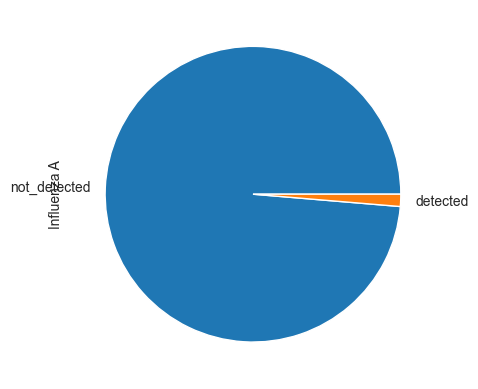

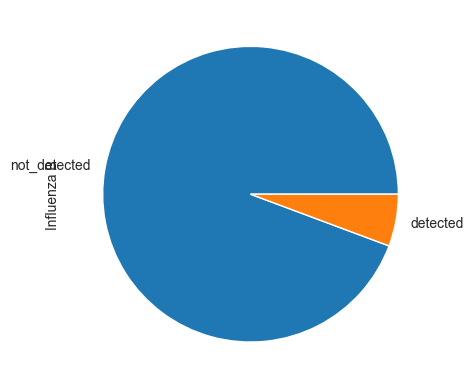

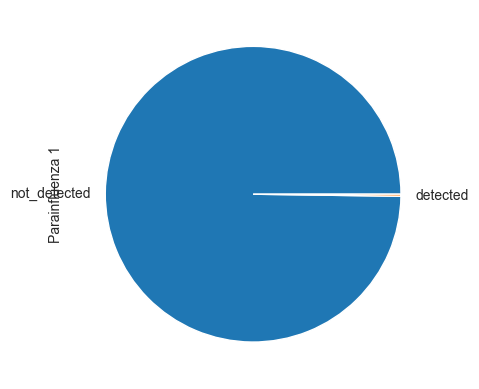

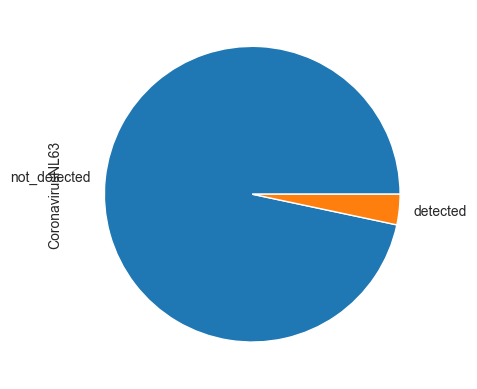

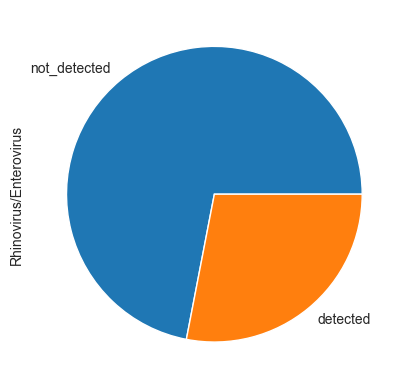

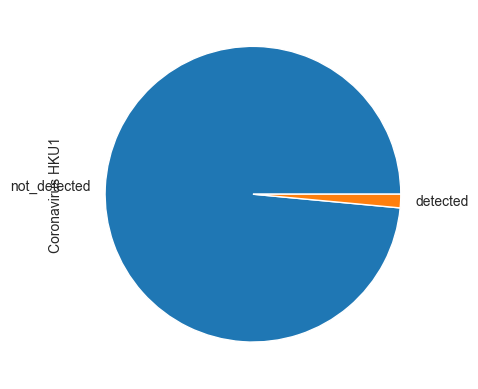

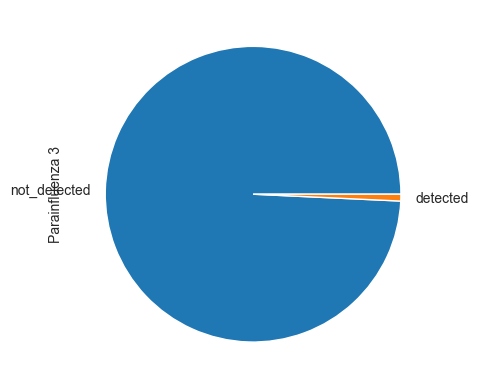

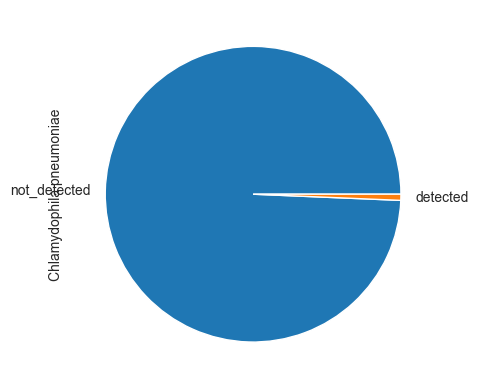

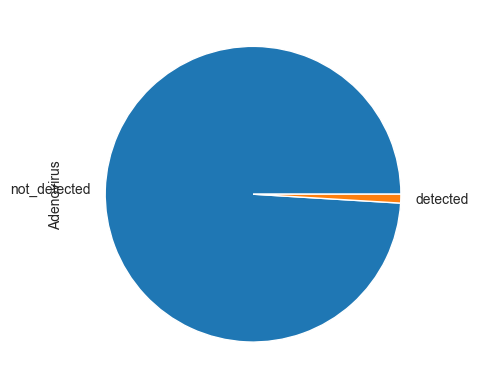

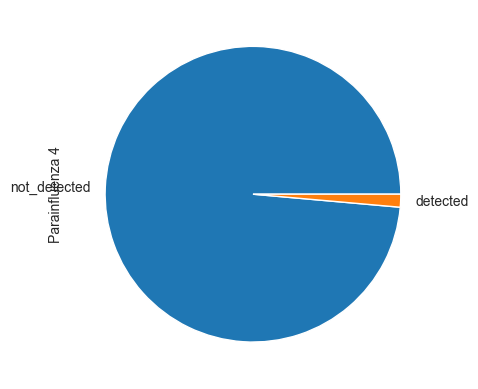

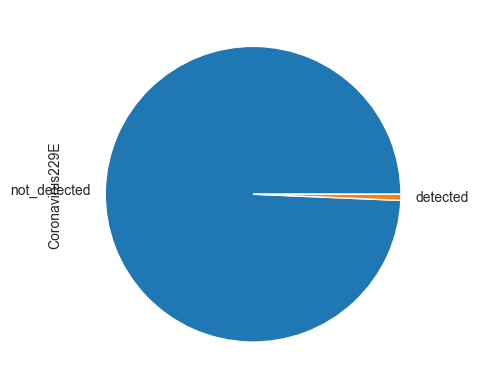

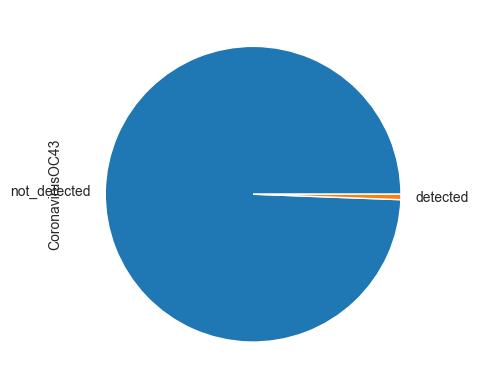

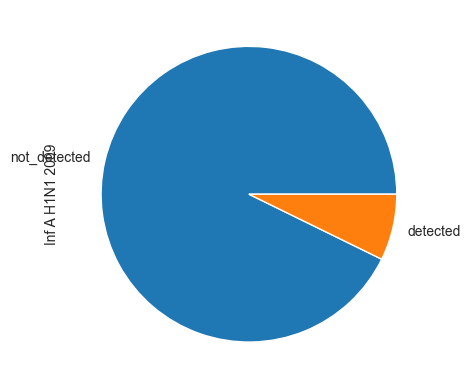

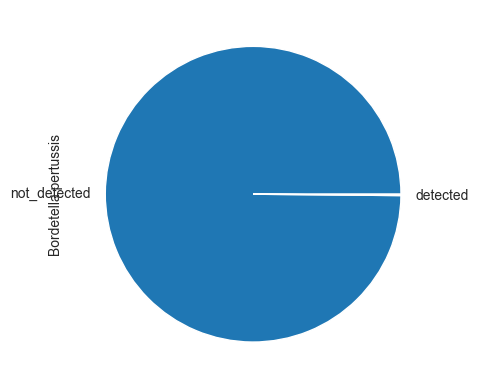

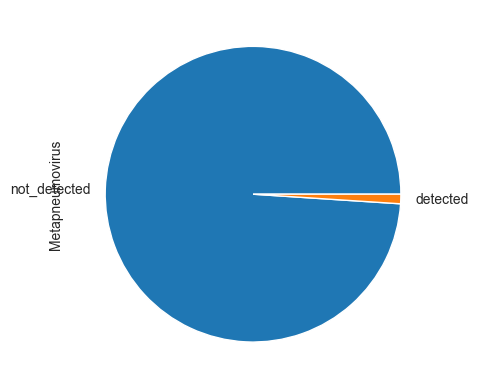

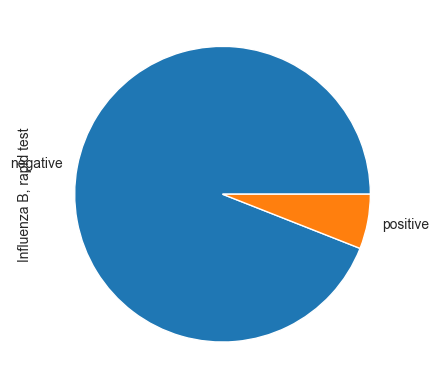

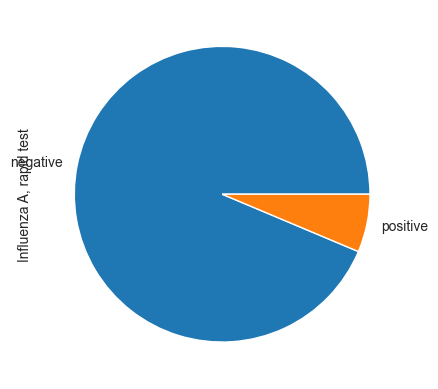

In [12]:
df_object_features = dataset.select_dtypes('object')
for col in df_object_features:
    print(f'{col :-<40} {dataset[col].unique()}')
dataset.drop('Parainfluenza 2', axis=1, inplace=True)
df_object_features.drop('Parainfluenza 2', axis=1, inplace=True)
for i in range(4):
    plt.figure()
    sns.boxplot(x=df_object_features.columns[i], y=float_features[i], data=dataset, hue=target)
for col in df_object_features:
    plt.figure()
    dataset[col].value_counts().plot.pie()

Divide our features into groups

In [13]:
feature_presence = dataset.isna().sum() / dataset.shape[0]
feature_continuos_category = dataset.columns[(feature_presence < 0.9) & (feature_presence > 0.88)]
feature_categorial_category = dataset.columns[(feature_presence < 0.8) & (feature_presence > 0.7)]

Relation target / features

C:\Users\Lenovo\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


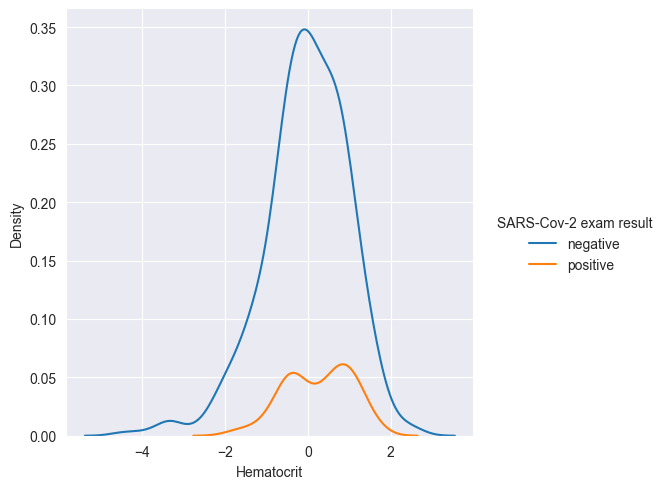

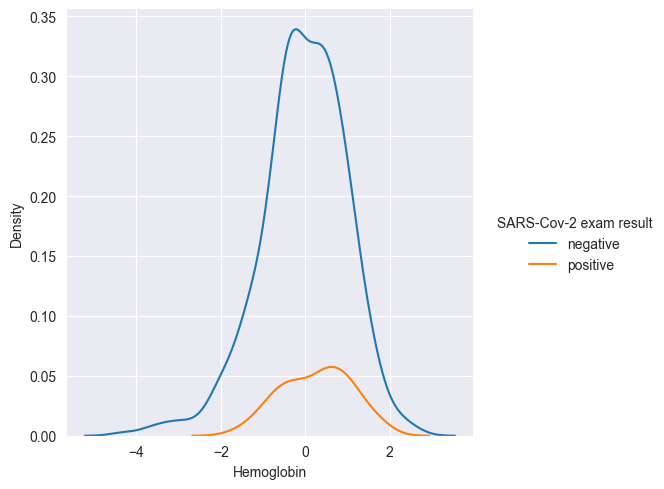

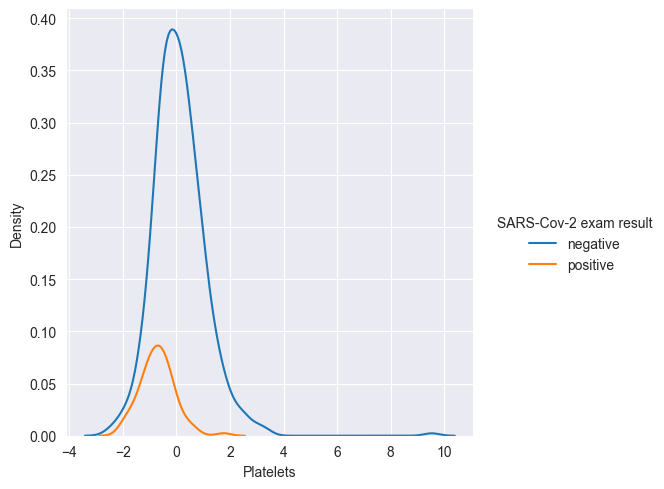

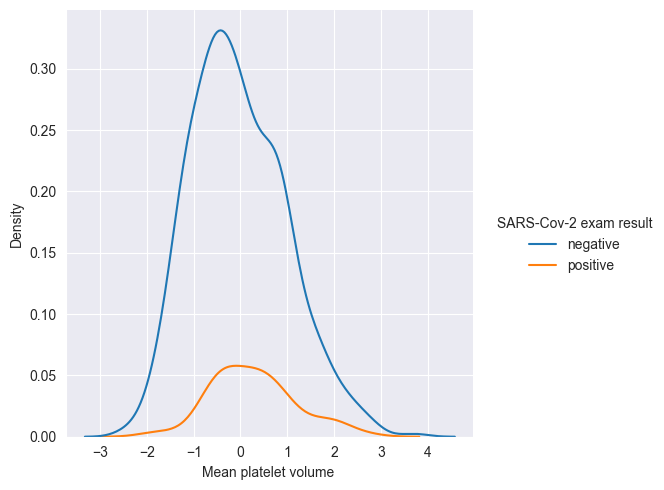

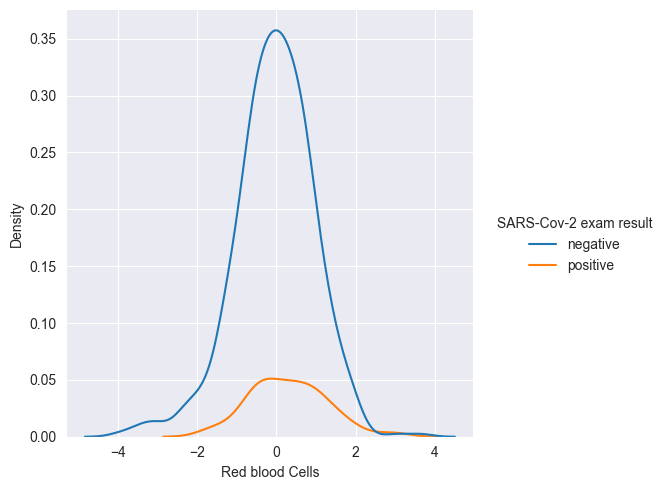

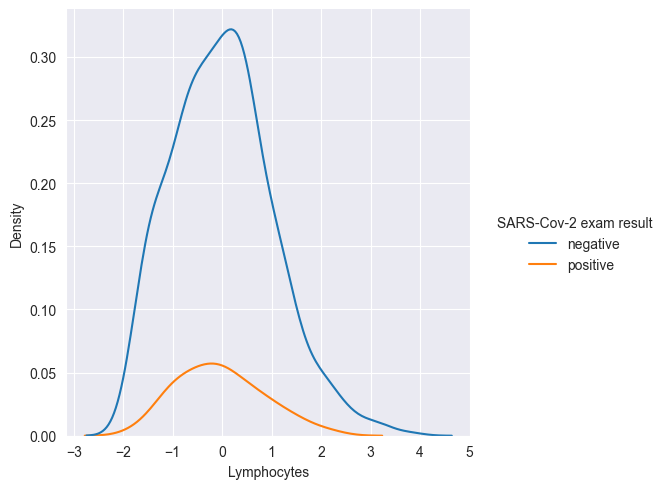

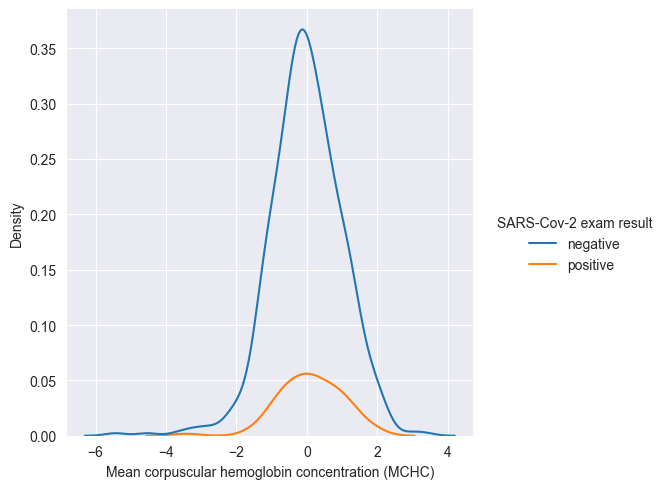

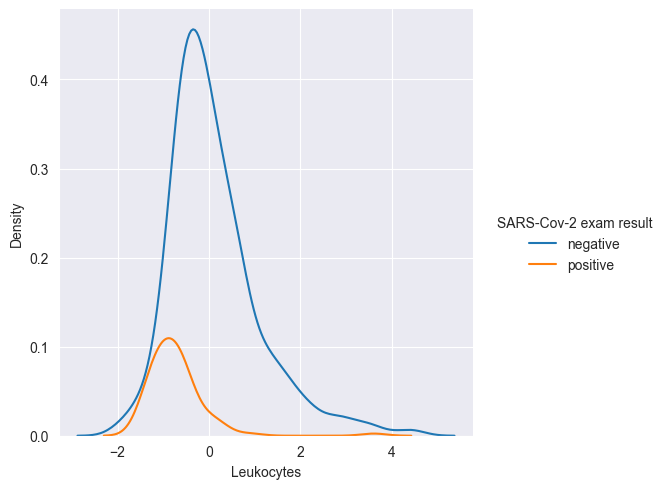

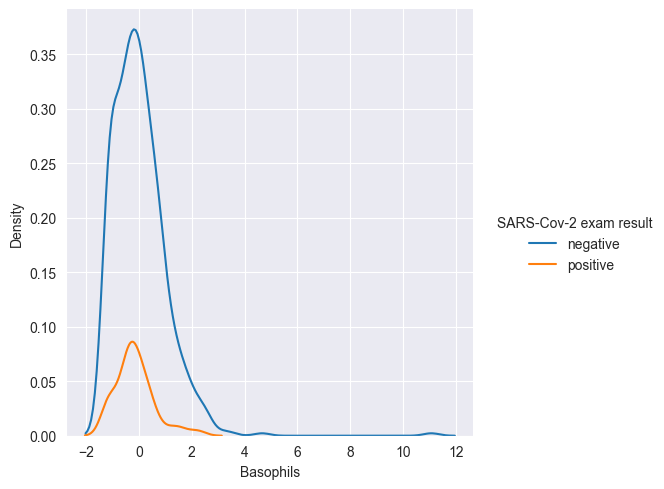

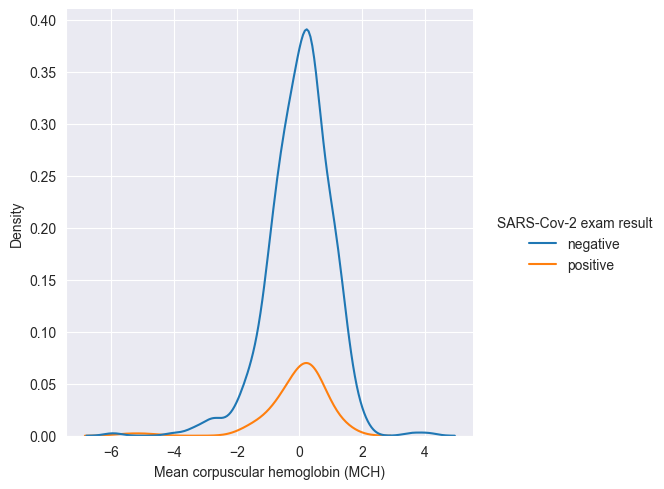

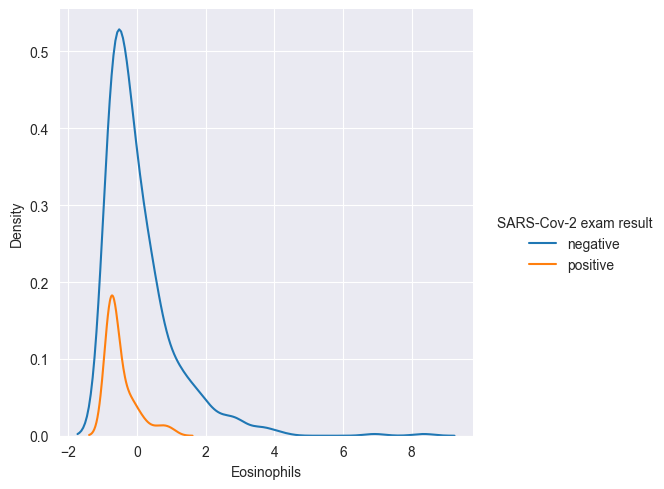

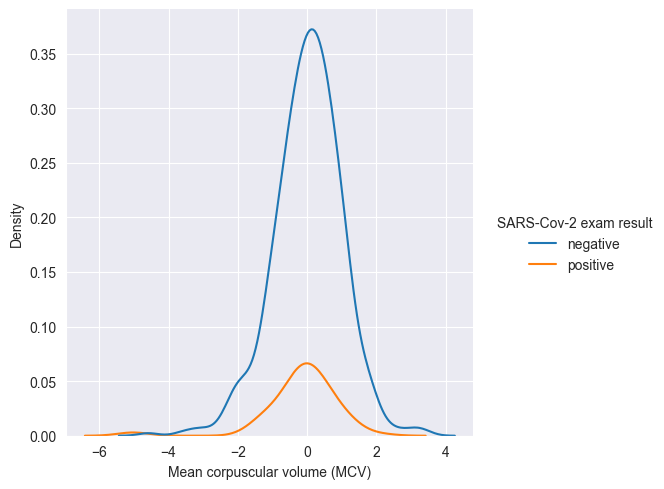

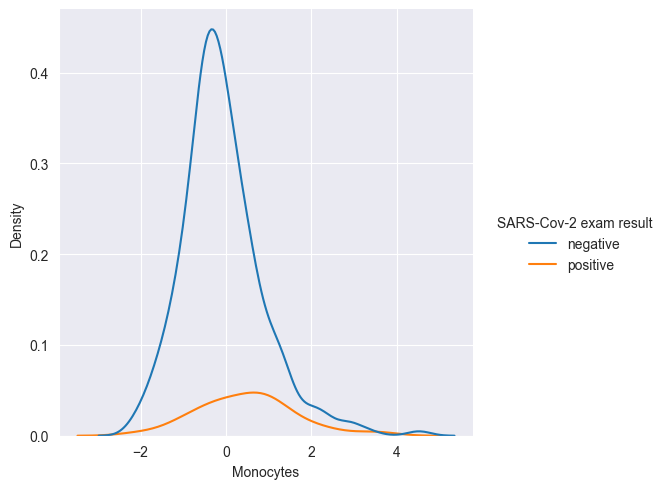

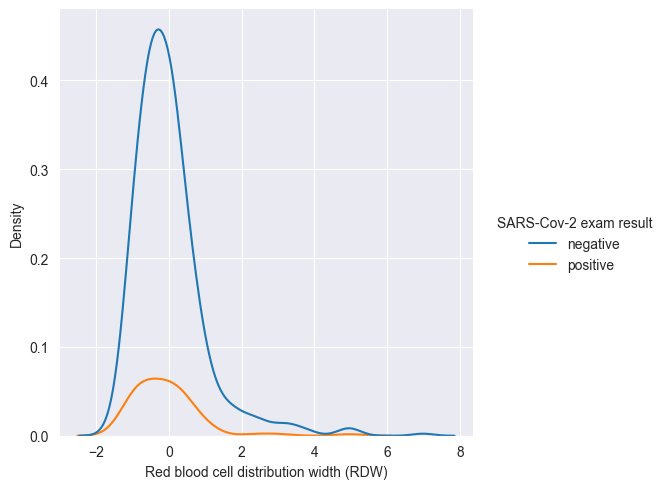

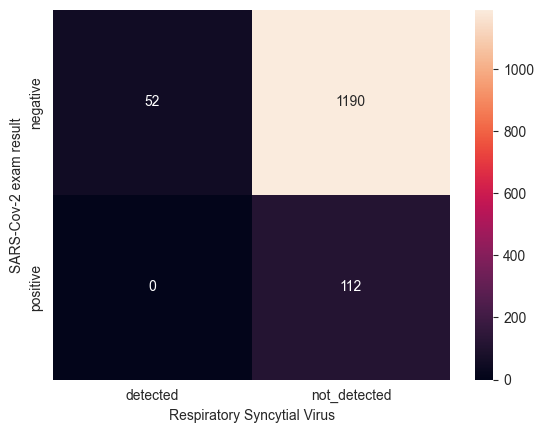

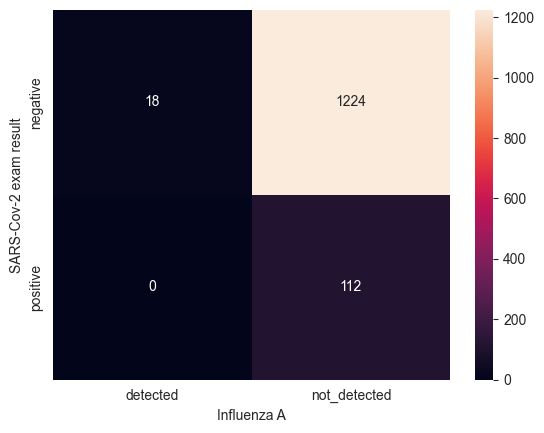

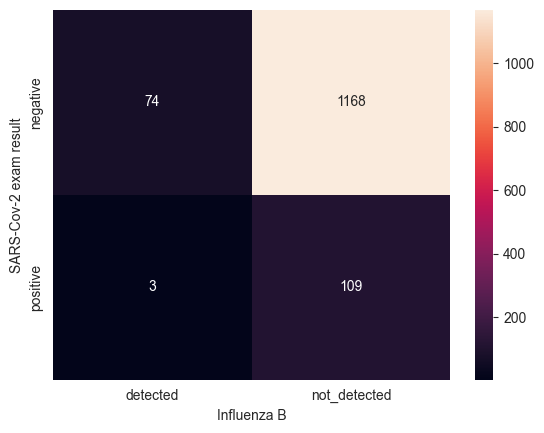

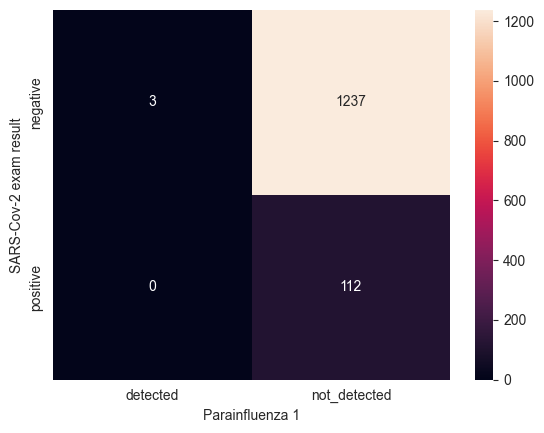

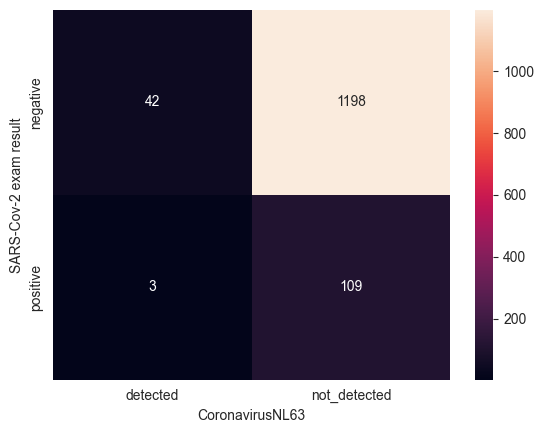

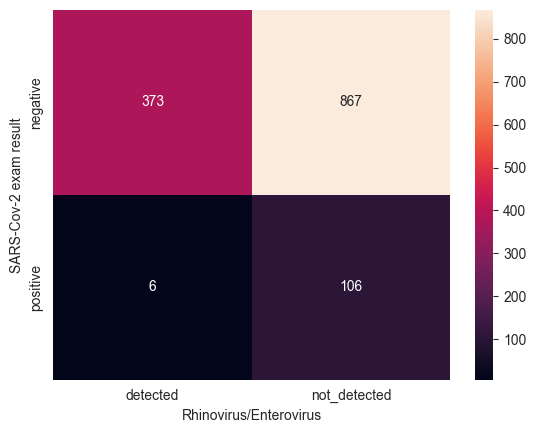

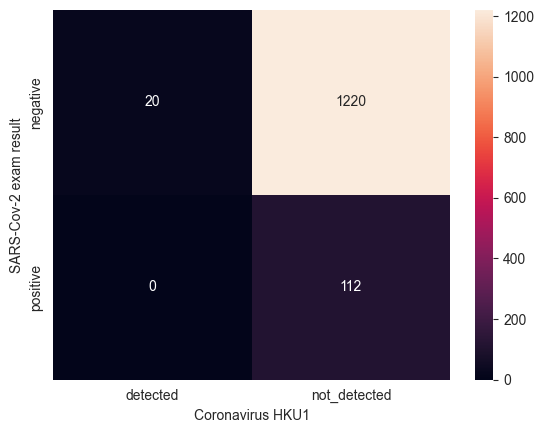

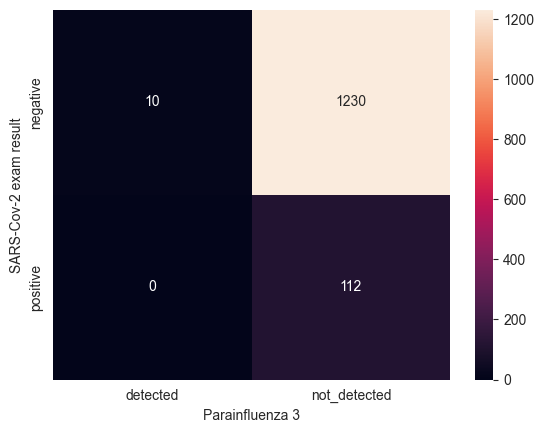

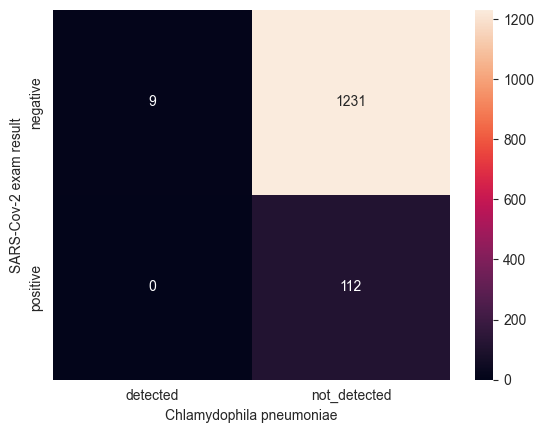

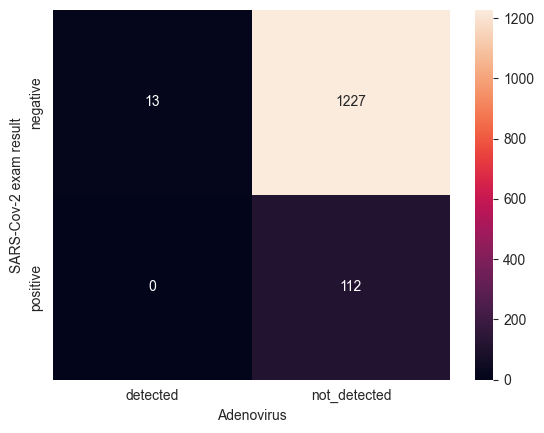

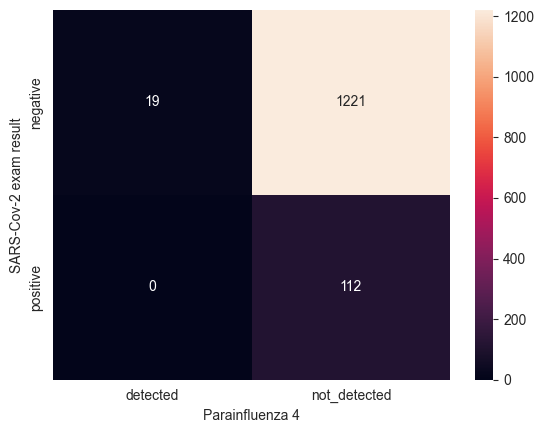

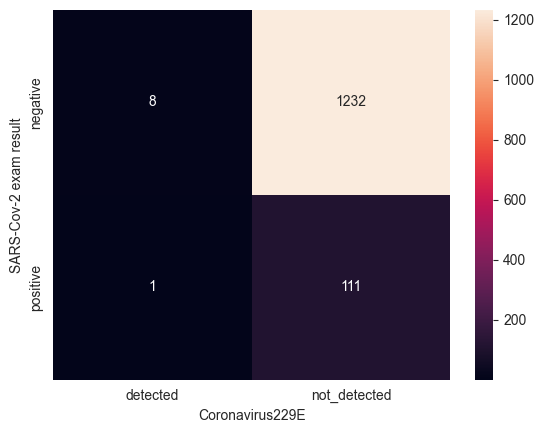

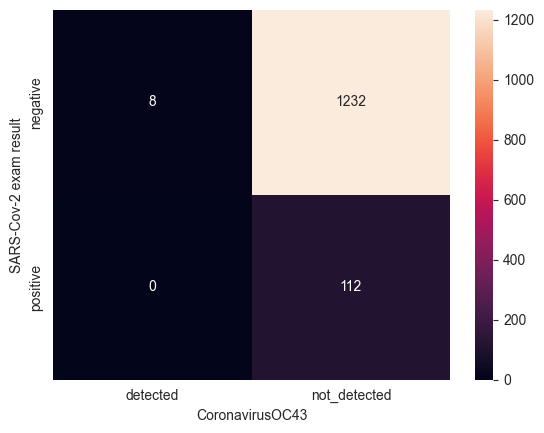

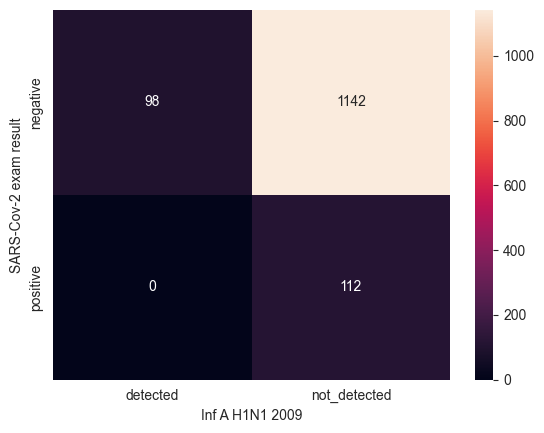

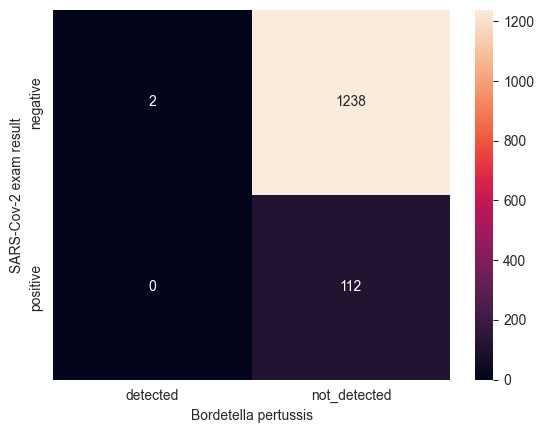

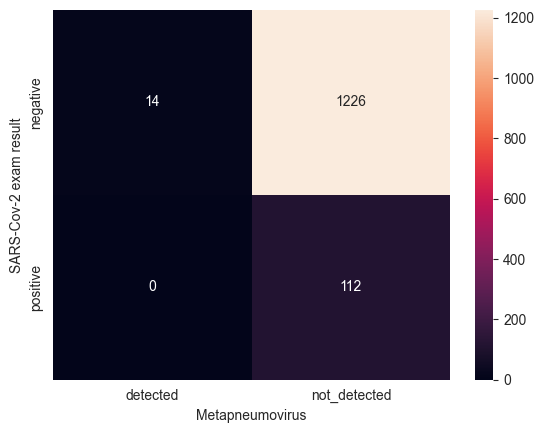

In [14]:
for col in feature_continuos_category:
    sns.displot(x=col, data=dataset, hue=target, kind='kde')
for col in feature_categorial_category:
    plt.figure()
    sns.heatmap(pd.crosstab(target, dataset[col]), annot=True, fmt='d')

Relation between continuos_features

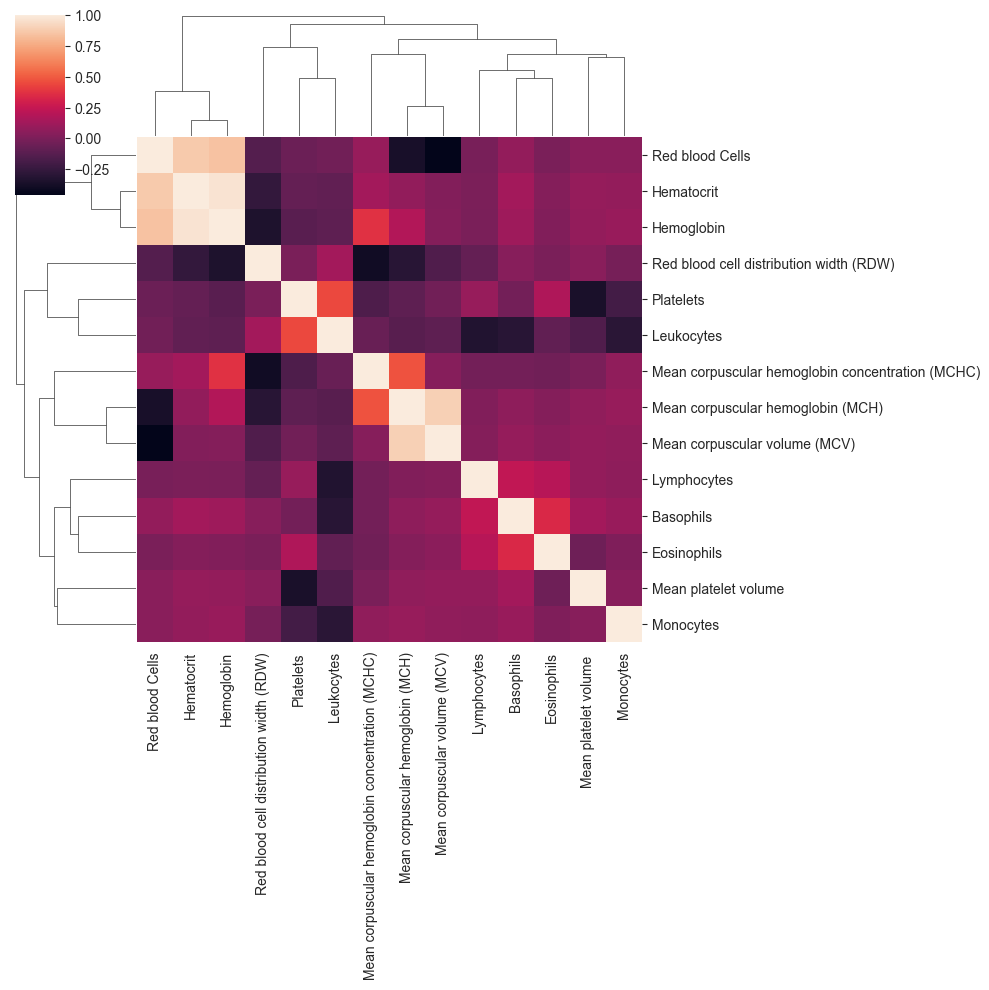

In [15]:
sns.clustermap(dataset[feature_continuos_category].corr())

Relation between numerical_features

In [16]:
correlation_dataset = dataset.corr()
for col in dataset.select_dtypes('int'):
    print(f'Feature: {col}')
    print(correlation_dataset[col].sort_values(ascending=False))
    print('-' * 50)

Feature: Patient age quantile
Patient age quantile                                     1.000000
Mean corpuscular volume (MCV)                            0.281655
Mean corpuscular hemoglobin (MCH)                        0.197394
Red blood cell distribution width (RDW)                  0.166429
Mean platelet volume                                     0.119449
Basophils                                                0.107525
Hematocrit                                               0.096808
Hemoglobin                                               0.060320
Monocytes                                                0.050962
Patient addmited to regular ward (1=yes, 0=no)           0.046166
Eosinophils                                              0.022085
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.015736
Patient addmited to intensive care unit (1=yes, 0=no)   -0.035772
Red blood Cells                                         -0.037510
Mean corpuscular hemoglobin concentration (MCH

How many maladies does a patient have?

<AxesSubplot:xlabel='maladies_count', ylabel='count'>

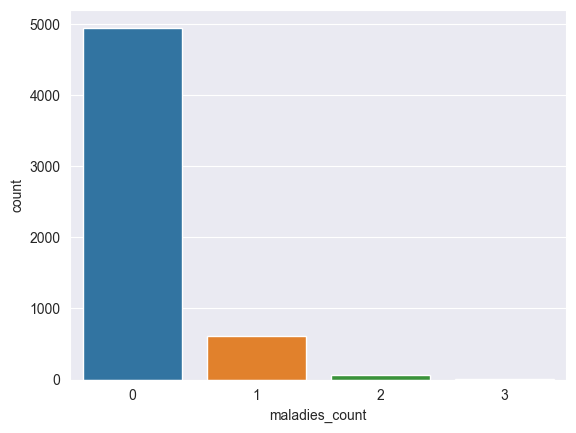

In [17]:
dataset['maladies_count'] = (dataset[feature_categorial_category] == 'detected').sum(axis=1)
sns.countplot(x='maladies_count', data=dataset)

Exploring Nan values in depth

In [18]:
continuos_dataset = dataset[feature_continuos_category]
continuos_dataset['covid'] = target
print('Target distribution in continuos_dataset')
print(continuos_dataset.dropna()['covid'].value_counts(normalize=True))
print('-' * 50)
categorial_dataset = dataset[feature_categorial_category]
categorial_dataset['covid'] = target
print('Target distribution in categorial_dataset')
print(categorial_dataset.dropna()['covid'].value_counts(normalize=True))

Target distribution in continuos_dataset
negative    0.864548
positive    0.135452
Name: covid, dtype: float64
--------------------------------------------------
Target distribution in categorial_dataset
negative    0.91716
positive    0.08284
Name: covid, dtype: float64


C:\Users\Lenovo\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Lenovo\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


T-Test

In [19]:
positive_dataset = dataset[target == 'positive']
negative_dataset = dataset[target == 'negative']
negative_dataset = negative_dataset.sample(positive_dataset.shape[0])

def t_test(col):
    limit = 0.02
    stat, p = ttest_ind(positive_dataset[col].dropna(), negative_dataset[col].dropna())
    if p < limit:
        return "HO à rejeter"
    else:
        return  "0"

for col in feature_continuos_category:
    print(f'{col :-<50}{t_test(col)}')

Hematocrit----------------------------------------0
Hemoglobin----------------------------------------0
Platelets-----------------------------------------HO à rejeter
Mean platelet volume -----------------------------0
Red blood Cells-----------------------------------HO à rejeter
Lymphocytes---------------------------------------0
Mean corpuscular hemoglobin concentration (MCHC)--0
Leukocytes----------------------------------------HO à rejeter
Basophils-----------------------------------------0
Mean corpuscular hemoglobin (MCH)-----------------0
Eosinophils---------------------------------------HO à rejeter
Mean corpuscular volume (MCV)---------------------0
Monocytes-----------------------------------------HO à rejeter
Red blood cell distribution width (RDW)-----------0
